In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [107]:
df = pd.read_csv(r"C:\Masterpiece By Nickopusan\Document\penguins.csv")
df.head()

,id,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [108]:
df.isnull().sum()

id                    0
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [109]:
# Fill missing values with the mean of the respective columns
df.fillna(df.mean(numeric_only=True), inplace=True)

# For categorical columns, you can fill missing values with the mode
df['sex'].fillna(df['sex'].mode()[0], inplace=True)

# Round numerical columns to two decimal places
df = df.round(1)


In [110]:
df_test = df.copy()

encoder = LabelEncoder()
df_test['species'] = encoder.fit_transform(df_test['species'])
df_test['island'] = encoder.fit_transform(df_test['island'])
df_test['sex'] = encoder.fit_transform(df_test['sex'])


In [111]:
df_test.describe()

,id,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
count,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000
mean,171.500000,0.918605,0.662791,43.921802,17.151453,200.915116,4201.754651,0.520349,2008.029070
std,99.448479,0.893320,0.726194,5.443644,1.969031,14.020658,799.613058,0.500313,0.818356
min,0.000000,0.000000,0.000000,32.100000,13.100000,172.000000,2700.000000,0.000000,2007.000000
25%,85.750000,0.000000,0.000000,39.275000,15.600000,190.000000,3550.000000,0.000000,2007.000000
50%,171.500000,1.000000,1.000000,44.250000,17.300000,197.000000,4050.000000,1.000000,2008.000000
75%,257.250000,2.000000,1.000000,48.500000,18.700000,213.000000,4750.000000,1.000000,2009.000000
max,343.000000,2.000000,2.000000,59.600000,21.500000,231.000000,6300.000000,1.000000,2009.000000


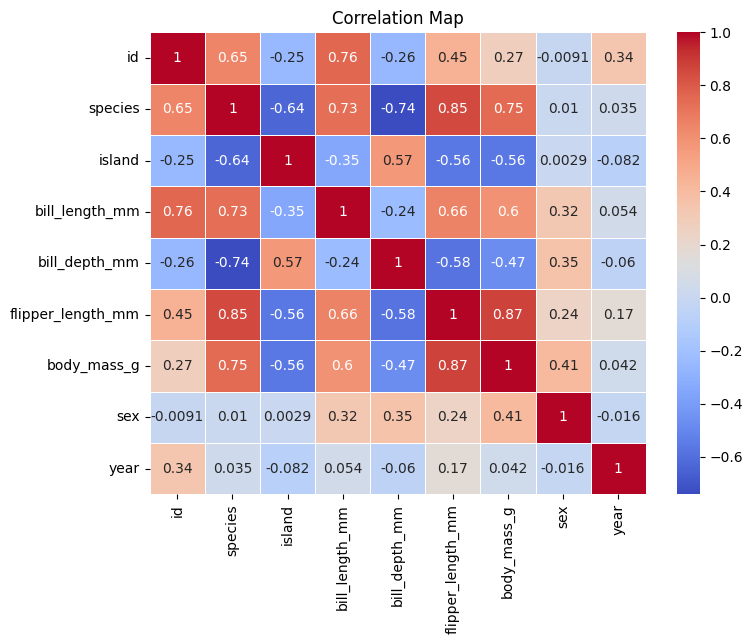

In [112]:
plt.figure(figsize=(8,6))
sns.heatmap(df_test.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Map")
plt.show()

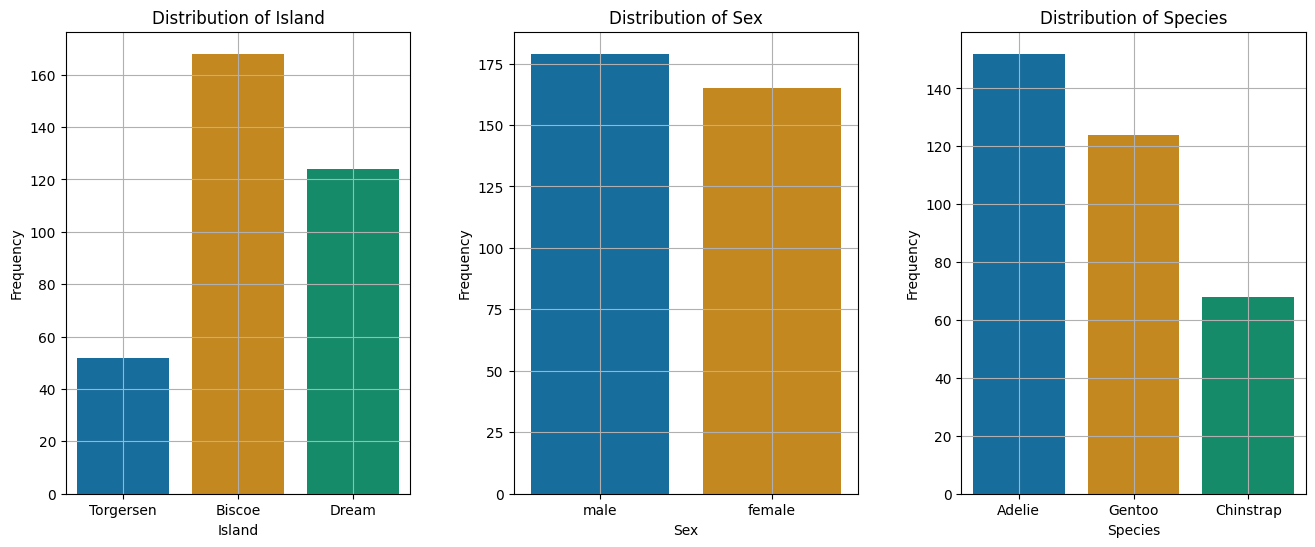

In [113]:
fig, axes = plt.subplots(1, 3, figsize=(16, 6))

# Distribution of Island
sns.countplot(data=df, x='island', palette='colorblind', ax=axes[0])
axes[0].set_title("Distribution of Island")
axes[0].set_xlabel("Island")
axes[0].set_ylabel("Frequency")
axes[0].grid(True)

# Distribution of Sex
sns.countplot(data=df, x='sex', palette='colorblind', ax=axes[1])
axes[1].set_title("Distribution of Sex")
axes[1].set_xlabel("Sex")
axes[1].set_ylabel("Frequency")
axes[1].grid(True)

# Distribution of Species
sns.countplot(data=df, x='species', palette='colorblind', ax=axes[2])
axes[2].set_title("Distribution of Species")
axes[2].set_xlabel("Species")
axes[2].set_ylabel("Frequency")
axes[2].grid(True)

plt.subplots_adjust(wspace=0.3)
plt.show()

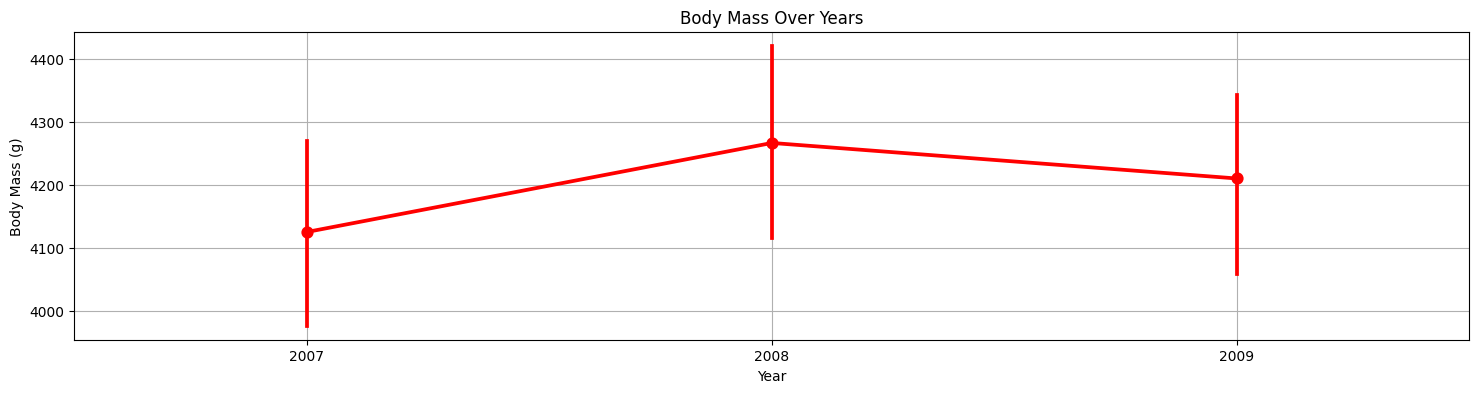

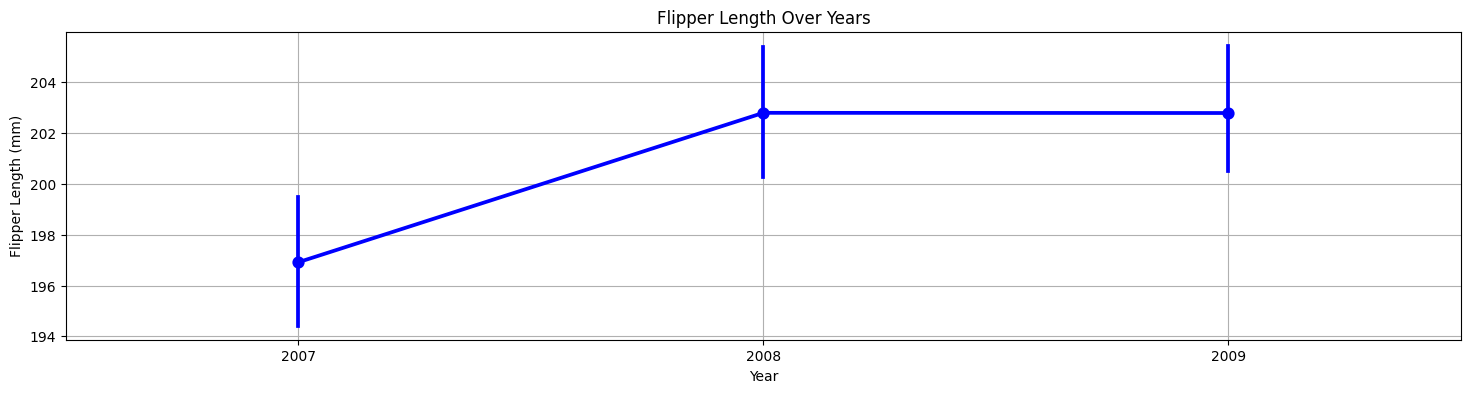

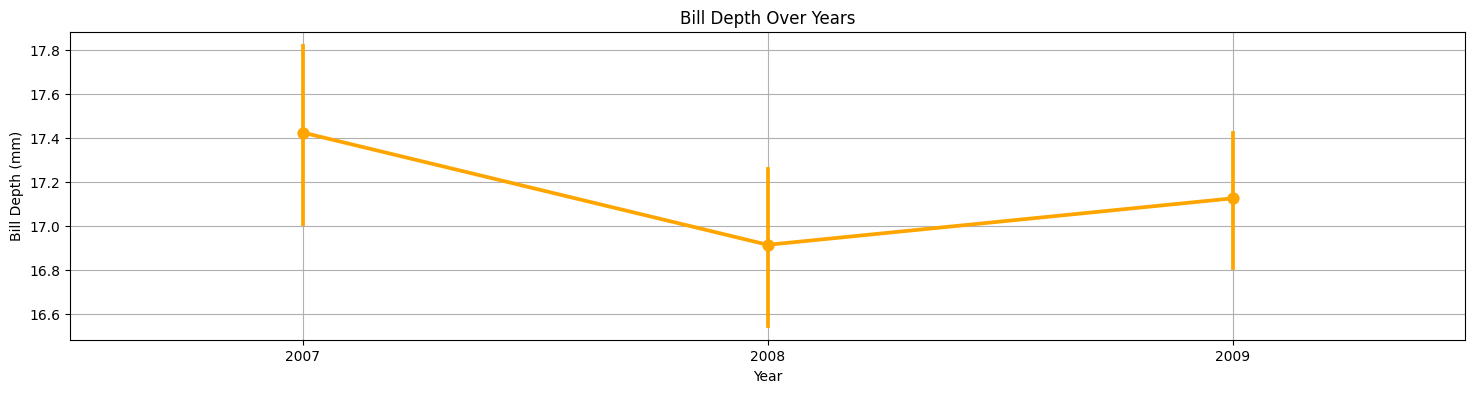

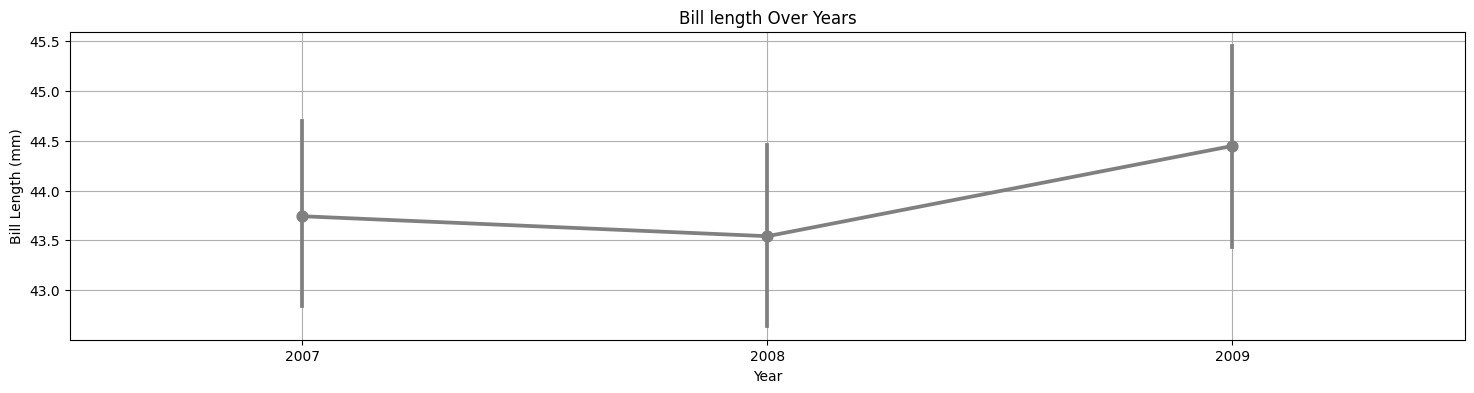

In [114]:
# Body Mass Over Years
plt.figure(figsize=(18, 4))
sns.pointplot(data=df, x='year', y='body_mass_g', color='red')
plt.title('Body Mass Over Years')
plt.xlabel('Year')
plt.ylabel('Body Mass (g)')
plt.grid(True)
plt.show()

# Flipper Length Over Years
plt.figure(figsize=(18,4))
sns.pointplot(data=df, x='year', y='flipper_length_mm', color='blue')
plt.title("Flipper Length Over Years")
plt.xlabel("Year")
plt.ylabel("Flipper Length (mm)")
plt.grid(True)
plt.show()

# Bill Depth Over Years
plt.figure(figsize=(18,4))
sns.pointplot(data=df, x='year', y='bill_depth_mm', color='orange')
plt.title("Bill Depth Over Years")
plt.xlabel("Year")
plt.ylabel("Bill Depth (mm)")
plt.grid(True)
plt.show()

# Bill Length Over Years
plt.figure(figsize=(18,4))
sns.pointplot(data=df, x='year', y='bill_length_mm', color='gray')
plt.title("Bill length Over Years")
plt.xlabel("Year")
plt.ylabel("Bill Length (mm)")
plt.grid(True)
plt.show()


In [119]:
df.head()

,id,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,3,Adelie,Torgersen,43.9,17.2,200.9,4201.8,male,2007
4,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


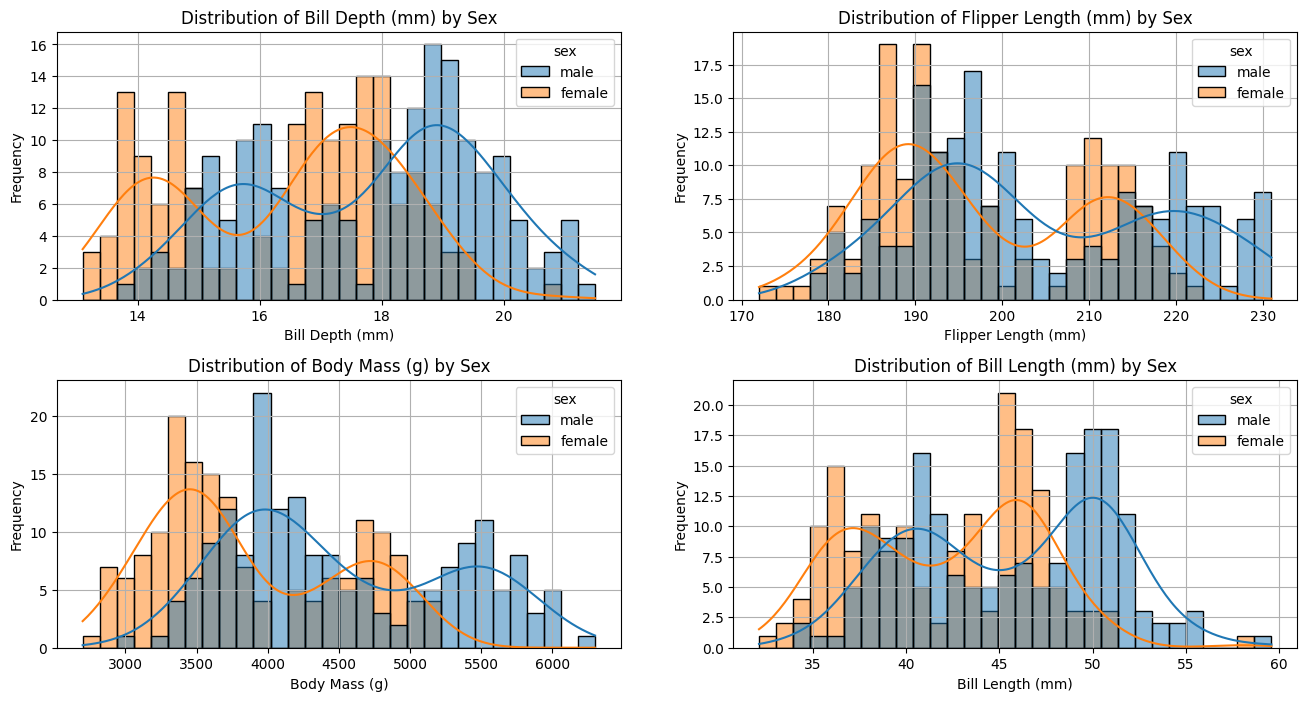

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 8))

# Distribution of Bill Depth by Sex
sns.histplot(data=df, x='bill_depth_mm', hue='sex', kde=True, bins=30, ax=axes[0,0])
axes[0,0].set_title('Distribution of Bill Depth (mm) by Sex')
axes[0,0].set_xlabel('Bill Depth (mm)')
axes[0,0].set_ylabel('Frequency')
axes[0,0].grid(True)

# Distribution of Bill Length by Sex
sns.histplot(data=df, x='bill_length_mm', hue='sex', kde=True, bins=30, ax=axes[1,1])
axes[1,1].set_title("Distribution of Bill Length (mm) by Sex")
axes[1,1].set_xlabel("Bill Length (mm)")
axes[1,1].set_ylabel("Frequency")
axes[1,1].grid(True)

# Distribution of Flipper Length
sns.histplot(data=df, x='flipper_length_mm', hue='sex', kde=True, bins=30, ax=axes[0,1])
axes[0,1].set_title("Distribution of Flipper Length (mm) by Sex")
axes[0,1].set_xlabel("Flipper Length (mm)")
axes[0,1].set_ylabel("Frequency")
axes[0,1].grid(True)

# Distribution of Body Mass
sns.histplot(data=df, x='body_mass_g', hue='sex', kde=True, bins=30, ax=axes[1,0])
axes[1,0].set_title("Distribution of Body Mass (g) by Sex")
axes[1,0].set_xlabel("Body Mass (g)")
axes[1,0].set_ylabel("Frequency")
axes[1,0].grid(True)

plt.subplots_adjust(hspace=0.3, wspace=0.2)
plt.show()

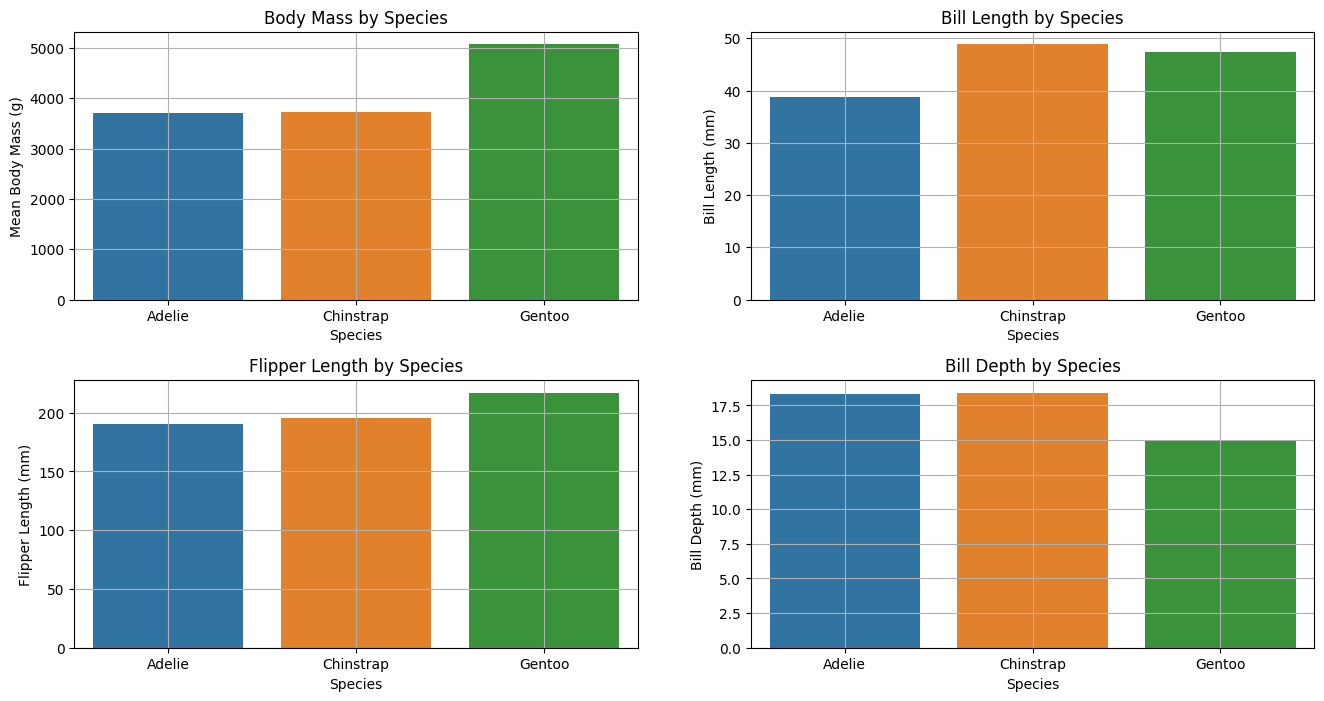

In [165]:
mean_per_species = df.groupby('species').mean(numeric_only=True).reset_index()
fig, axes = plt.subplots(2,2, figsize=(16,8))

# Body Mass by Species
sns.barplot(data=mean_per_species, x='species', y='body_mass_g', hue='species', ax=axes[0,0])
axes[0,0].set_title('Body Mass by Species')
axes[0,0].set_xlabel('Species')
axes[0,0].set_ylabel('Mean Body Mass (g)')
axes[0,0].grid(True)

# Bill Length by Species
sns.barplot(data=mean_per_species, x='species', y='bill_length_mm', hue='species', ax=axes[0,1])
axes[0,1].set_title('Bill Length by Species')
axes[0,1].set_xlabel('Species')
axes[0,1].set_ylabel('Bill Length (mm)')
axes[0,1].grid(True)

# Bill Depth by Species
sns.barplot(data=mean_per_species, x='species', y='bill_depth_mm', hue='species', ax=axes[1,1])
axes[1,1].set_title('Bill Depth by Species')
axes[1,1].set_xlabel('Species')
axes[1,1].set_ylabel('Bill Depth (mm)')
axes[1,1].grid(True)

# Flipper Length by Species
sns.barplot(data=mean_per_species, x='species', y='flipper_length_mm', hue='species', ax=axes[1,0])
axes[1,0].set_title('Flipper Length by Species')
axes[1,0].set_xlabel('Species')
axes[1,0].set_ylabel('Flipper Length (mm)')
axes[1,0].grid(True)

plt.subplots_adjust(hspace=0.3, wspace=0.2)
plt.show()